# Heart Disease Prediction Model for Patients Dataset

Qinyu Chen 13023662  
Zhiliang Zhao 12782886

## Exploration

Import our dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/qinyu0831/UTS_ML2019_ID13023662/master/heart.csv'
ds = pd.read_csv(url)

In [3]:
ds.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

This data set contains 14 attributes. The "target" field refers to the presence of heart disease in the patient.

__age__: The person's age in years

__sex__: The person's sex (1 = male, 0 = female)

__cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

__trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)

__chol__: The person's cholesterol measurement in mg/dl

__fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

__restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

__thalach__: The person's maximum heart rate achieved

__exang__: Exercise induced angina (1 = yes; 0 = no)

__oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

__ca__: The number of major vessels (0-3)

__thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

__target__: Heart disease (0 = no, 1 = yes)

|  Column  |  type  | Description |
| :----: | :----: |  :----- |
| age | int64 | 
| sex | int64 | 1 = male, 0 = female
| cp  |  int64 | Chest pain type  (0 = typical angina, 1 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
| trestbps  |  int64 | Resting blood pressure (unit = mm Hg at admission)
| chol  |   int64 | Cholesterol measurement (unit = mg/dl)
| fbs  |   int64 | if Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
|restecg    | int64 | Resting ECG measurements (0 = normal, 1 = ST-T wave abnormality occurred, 2 = possible or determined left ventricular hypertrophy according to Estes' criteria)
|thalach   | int64 | Maximum heart rate reached
|exang      | int64 | Have there been exercise-induced angina? (1 = true; 0 = false)
|oldpeak  |float64 | After exercise, ST depression positions are shown in the ECG.
|slope     |  int64 | Slope of the highest motion ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
|ca       |  int64 | Major vessels (quantity range:{0,1,2,3,4})
|thal      | int64 | A blood disease called thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect)
|target     |int64 | Heart disease (1 = true, 0 = false)


In [4]:
# top 5 rows
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
ds.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# shape of the data
ds.shape

(303, 14)

In [8]:
# summary statistics
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002827D0BD780>,
      dtype=object)

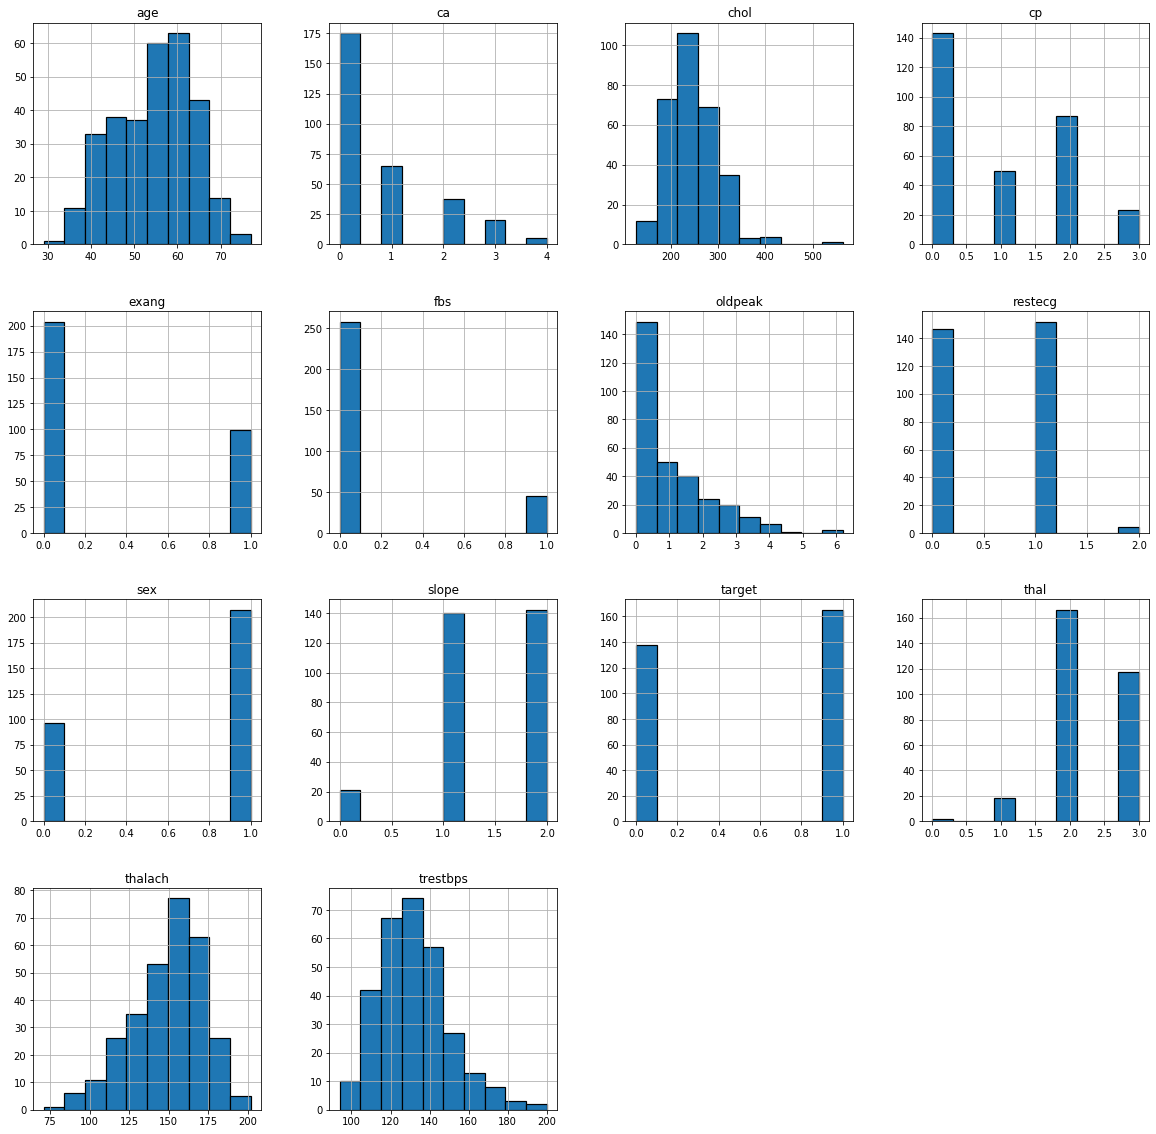

In [9]:
# distribution of every feature

ds.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

From the exploration above, we can Separate out the Categorical and Numeric data:

|  CATEGORICAL ATTRIBUTES   | NUMERIC ATTRIBUTES  |
| :----: | :----: |
| sex  | age |
| cp  | trestbps |
| fbs  | chol |
| restecg  | trestbps |
| exang | oldpeak |
| slope | |	
| ca	| |
| thal	| |
| target	| |


### Exploration of Features

'target' indicates whether the patient has heart disease. 

1 = "this patient has heart disease"  
0 = "this patient do not has heart disease"

Let us check the frequency distribution of target variable:

In [10]:
# analysis of 'target'
ds['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### age

__age__: The person's age in years

In [11]:
ds['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

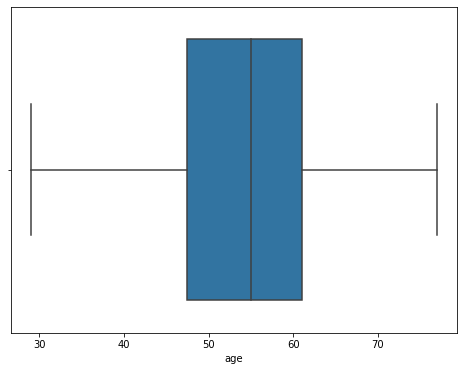

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["age"])
plt.show()

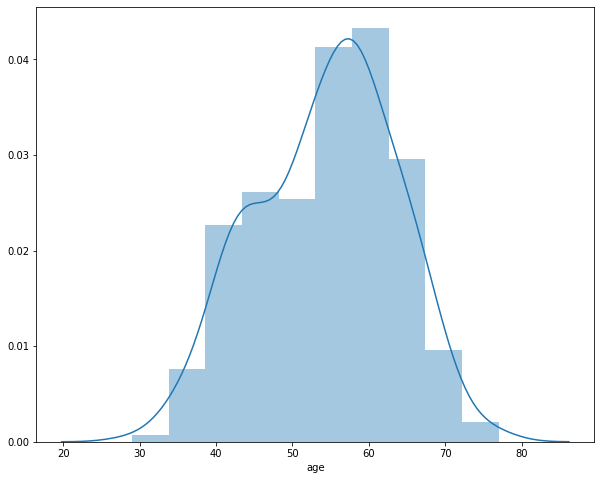

In [13]:
f, ax = plt.subplots(figsize=(10,8))
x = ds['age']
ax = sns.distplot(x, bins=10)
plt.show()

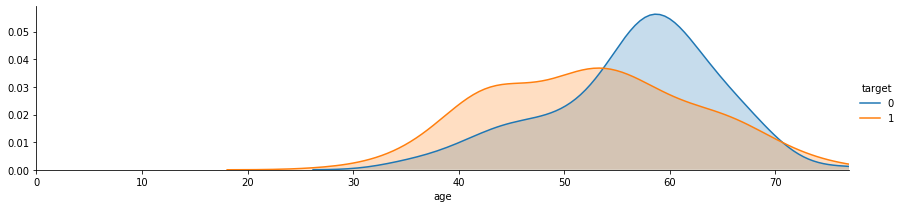

In [14]:
fig = sns.FacetGrid(ds, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)

oldest = ds['age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

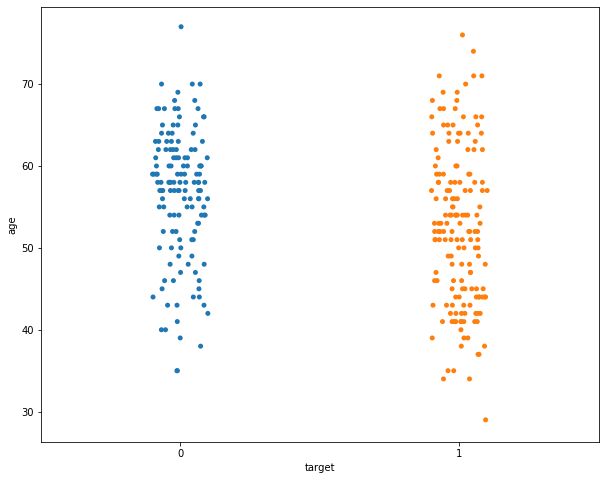

In [15]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="age", data=ds)
plt.show()

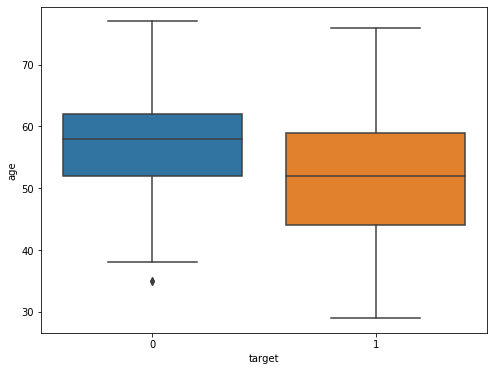

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=ds)
plt.show()

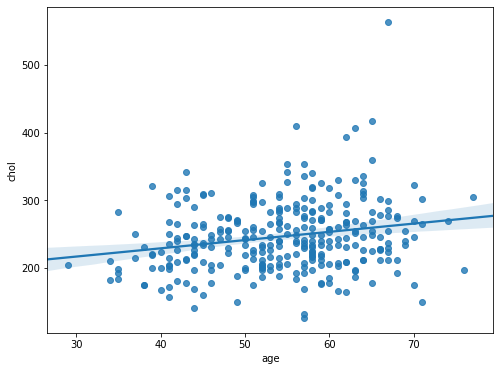

In [100]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=ds)
plt.show()

From the figures above, we can found that:

    The distribution figure of age is almost a normal distribution.

    Patients with heart disease have a smaller mean age and a wider age distribution.

### trestbps

__trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)

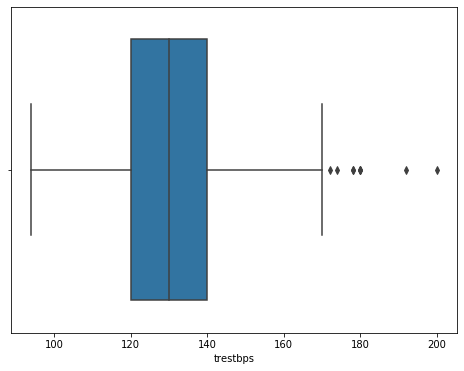

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["trestbps"])
plt.show()

trestbps variable contains outliers to the right side.

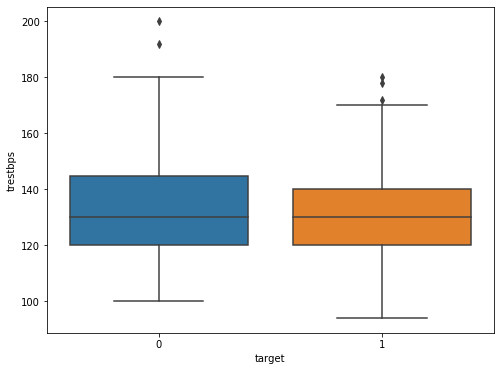

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="trestbps", data=ds)
plt.show()

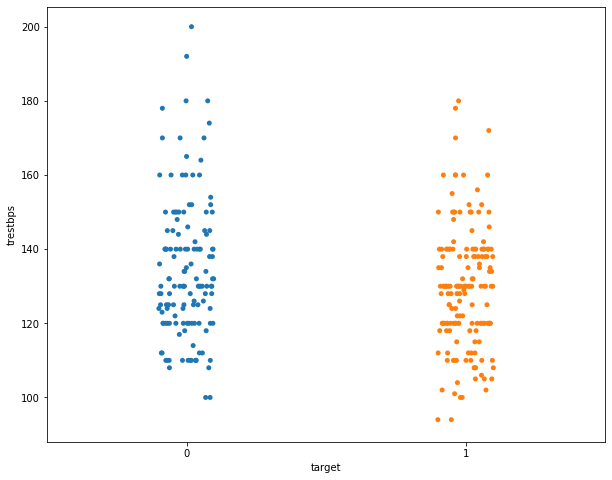

In [19]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="trestbps", data=ds)
plt.show()

### chol

__chol__: The person's cholesterol measurement in mg/dl

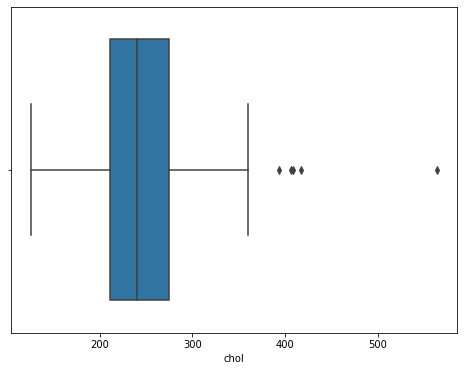

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["chol"])
plt.show()

outliners to the right side

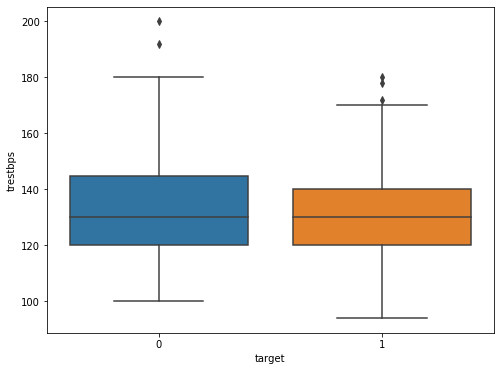

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="trestbps", data=ds)
plt.show()

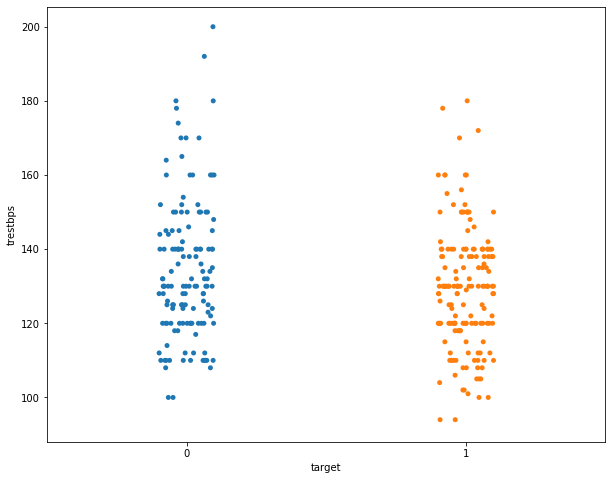

In [22]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="trestbps", data=ds)
plt.show()

### thalach

__thalach__: The person's maximum heart rate achieved

In [23]:
ds['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

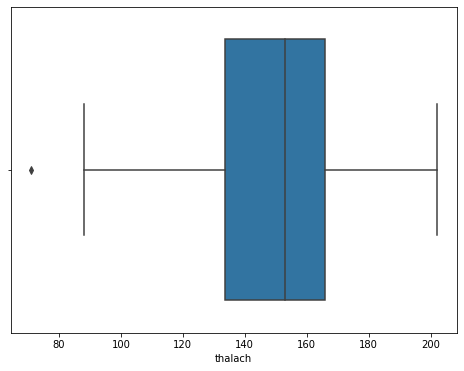

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["thalach"])
plt.show()

One outliner to the left side.

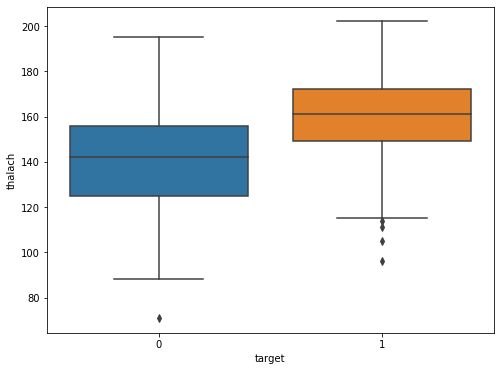

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=ds)
plt.show()

The maximum heart rate achieved by people with heart disease is much higher than those without disease.

### oldpeak

__oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

In [26]:
ds['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

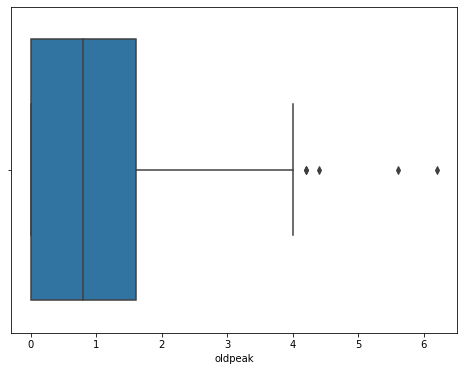

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=ds["oldpeak"])
plt.show()

Outliners to the right side

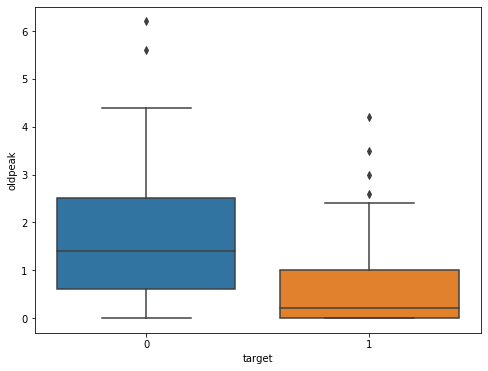

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="oldpeak", data=ds)
plt.show()

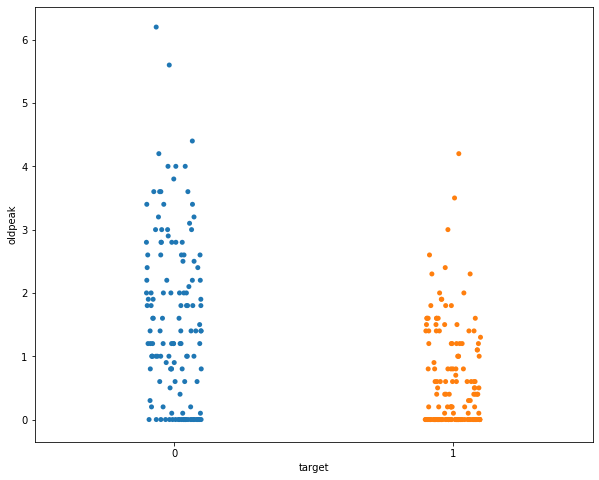

In [29]:
f, ax = plt.subplots(figsize=(10,8 ))
sns.stripplot(x="target", y="oldpeak", data=ds)
plt.show()

The 'oldpeak' of patients with heart disease is below 2

### restecg

__restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [30]:
ds.groupby('restecg')['target'].value_counts()

restecg  target
0        0         79
         1         68
1        1         96
         0         56
2        0          3
         1          1
Name: target, dtype: int64

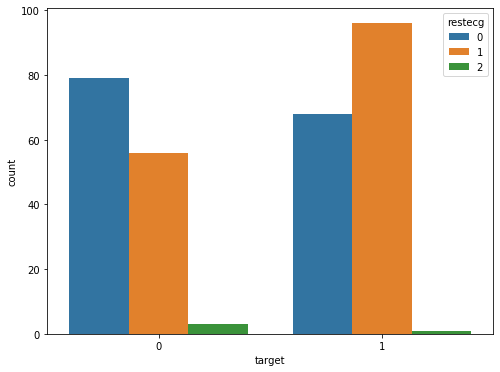

In [31]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="restecg",data=ds)
plt.show()

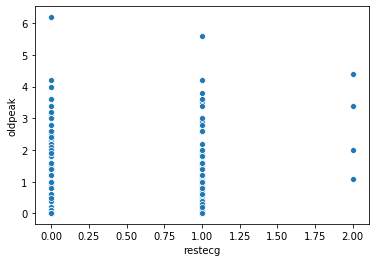

In [103]:
sns.scatterplot(x="restecg",y="oldpeak",data=ds)

### sex

__sex__: The person's sex (1 = male, 0 = female)

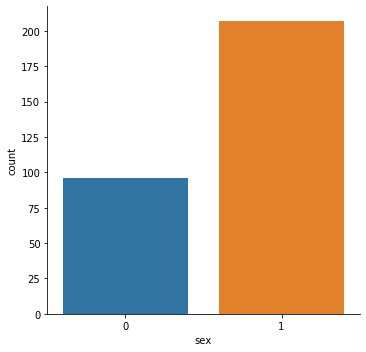

In [32]:
# analyis of 'target' with 'sex'
# counts of gender
sns.catplot('sex', data=ds, kind='count')

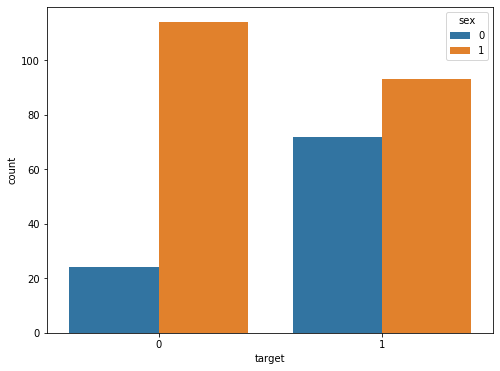

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="sex",data=ds)
plt.show()

In [34]:
ds.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

In [35]:
72/(72+24) * 100

75.0

In [36]:
93/(114+93) * 100

44.927536231884055

75.00% female patients have heart disease.(72 out of 96) 

44.92% male patients have heart disease.(93 out of 207)

Data has more male population with no heart disease than female, however, the population of patients with heart disease is almost the same, with the female population spread over a longer age range.

### fbs

__fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)  

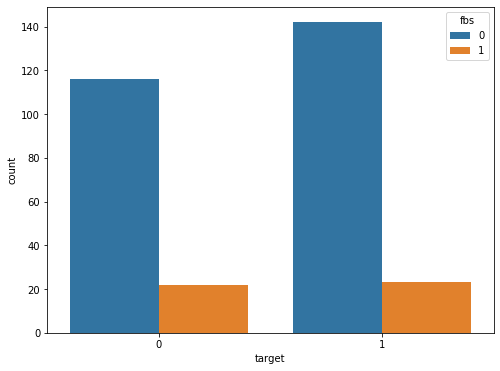

In [37]:
# analysis of fbs(fasting blood sugar)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=ds)
plt.show()

In [38]:
ds.groupby('fbs')['target'].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

'fbs' is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.

### exang

__exang__: Exercise induced angina (1 = yes; 0 = no)  

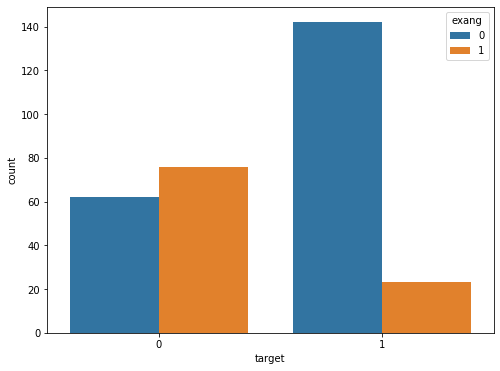

In [39]:
# analysis of exang (exercise induced angina)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=ds)
plt.show()

In [40]:
ds.groupby('exang')['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

In [41]:
142/(142+23) * 100

86.06060606060606

86% patients with heart disease do not have exercise induced angina.  
Obviously, most patients with heart disease do not have Exercise induce angina.

### cp

__cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic) 

In [42]:
ds['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

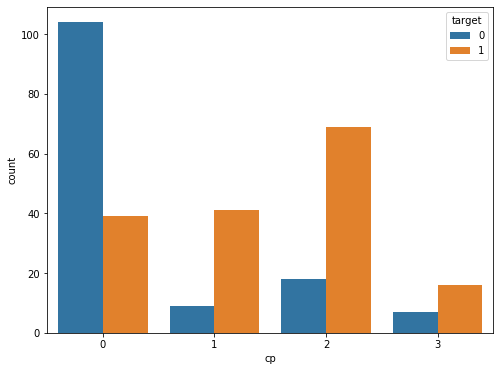

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=ds)
plt.show()

In [44]:
ds.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

When cp is greater than or equal to 1, the chance of heart disease is greatly increased.

Typical angina accounts for most cases with no heart disease. Populations with anything other than typical angina have a higher chance of having heart disease.

### slope

__slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [45]:
ds['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

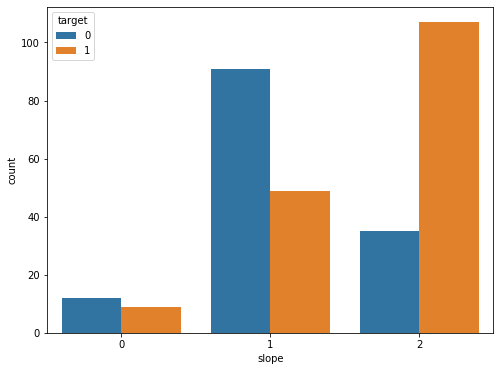

In [46]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="slope", hue="target", data=ds)
plt.show()

In [47]:
ds.groupby('slope')['target'].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64

The probability of a patient with  downsloping(slope=2) suffering from heart disease is much greater than the other two types.

populations with downsloping and flat sloping have a higher incidence of heart disease.

### ca

__ca__: The number of major vessels (0-3)

In [48]:
ds.groupby('ca')['target'].value_counts()

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64

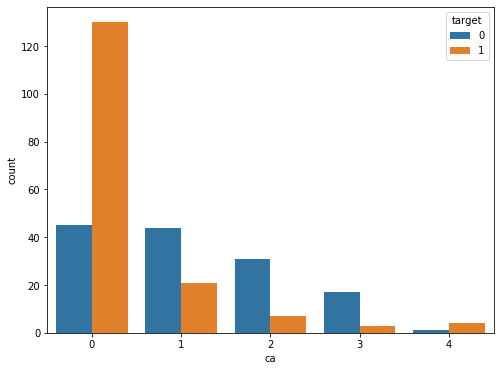

In [49]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ca", hue="target", data=ds)
plt.show()

Most of patients with heart disease have 0 major vessel.

Patients with no vessels colored by fluoroscopy have a much higher incidence of heart disease.

### thal

__thal__: A blood disorder called thalassemia 

In [50]:
ds.groupby('thal')['target'].value_counts()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64

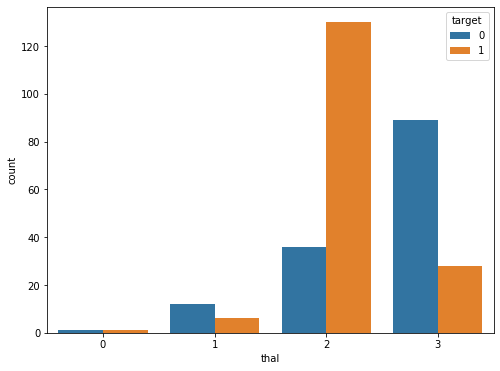

In [51]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="target", data=ds)
plt.show()

The blood discover result of most of patients with heart disease is 2.

Patients with fixed defect have a significantly higher incidence of heart disease.

### Correlation Heatmap

To discover patterns and relationships between variables in the dataset

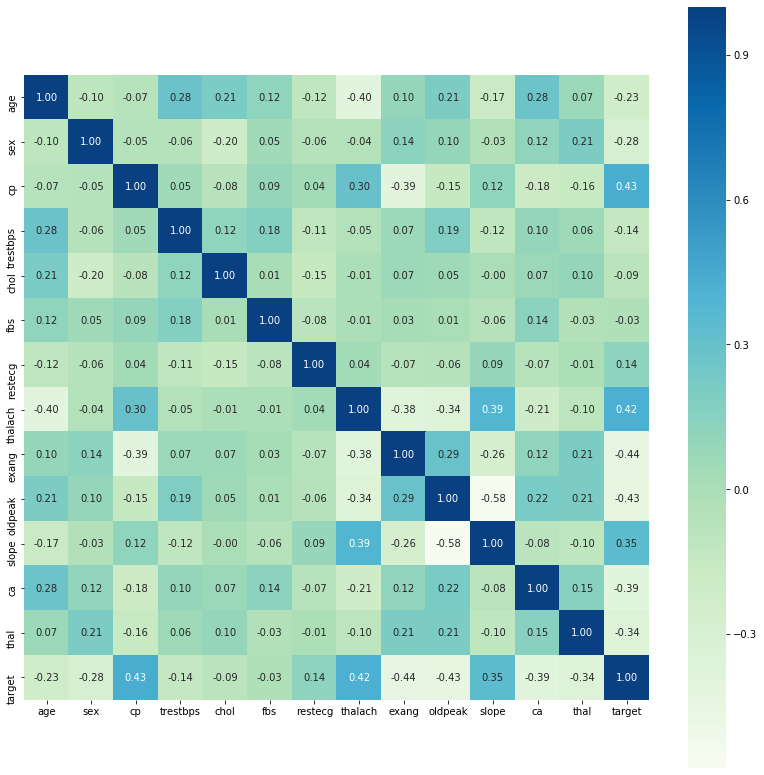

In [52]:
plt.figure(figsize=(14,14))
sns.heatmap(ds.corr(), cmap='GnBu',square=True, annot=True, fmt='.2f')        

From the heat map above, we can find that:  
The attributes that are slightly positively correlated with the target are __cp(0.43), thalach(0.42), slope(0.35)__.  
The attributes that are slightly negatively correlated with the target are __exang(-0.44), oldpeak(-0.43), ca(-0.39),thal(-0.34)__.   

## Data preprocessing

Check for missing values:

In [53]:
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values in this dataset.

'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' are categoriacal values, we can convert them to dummy variables.

In [54]:
categorical_val = []
for column in ds.columns:
    if len(ds[column].unique()) <= 10:
        categorical_val.append(column)

In [55]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [56]:
categorical_val.remove('target')

In [57]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [58]:
dataset = pd.get_dummies(ds, columns = categorical_val)
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Some algorithms such as SVM requires all features to vary within a similar range, so we need to rescale our data.

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = sc.fit_transform(dataset[col_to_scale])

In [60]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [61]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [62]:
X = dataset.drop('target', axis=1)
y = dataset.target

In [63]:
X.shape

(303, 30)

In [64]:
y.shape

(303,)

# Methodology

In this section, we used three machining learning algorithms to make predictions, they are K-nearest neighbors, Logistic Regression and Support Vector Machine.

Before we apply maching learning algorithms, we firstly normalize the data.

And we trained 80% of the data and tested it with 20% of the data. The model learns on the training set based on known output, and the test data is used to evaluate the accuracy of the model.

In [65]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values #normalize

In [66]:
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [68]:
from math import sqrt
from collections import Counter

In [69]:
def accuracy_score(y_true, y_predict):
    assert y_true.shape[0] == y_predict.shape[0], \
        "the size of y_true must be equal to the size of y_predict"

    return sum(y_true == y_predict) / len(y_true)

### K-nearest neighbors

In [70]:
class KNNClassifier:

    def __init__(self, k):

        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None

    def fit(self, X_train, y_train):

        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self

    def predict(self, X_predict):

        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"

        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)

    def _predict(self, x):

        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]

    def __repr__(self):
        return "KNN(k=%d)" % self.k

In [71]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train.to_numpy(), y_train.to_numpy())
y_predict = my_knn_clf.predict(X_test.to_numpy())

In [72]:
accuracy_score(y_test, y_predict)

0.7704918032786885

Use K-nn Classifier from sklearn: 

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_clf = KNeighborsClassifier()

In [75]:
# Find the best k
best_score = 0.0
best_k = -1
for k in range(1, 21):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k =", best_k)
print("best_score =", best_score)

best_k = 5
best_score = 0.819672131147541


In [76]:
best_knn_clf = KNeighborsClassifier(n_neighbors=5)
best_knn_clf.fit(X_train, y_train)
y_pred = best_knn_clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  6]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.84      0.86      0.85        36

    accuracy                           0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



Grid Search:

In [95]:
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 21)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 21)], 
        'p': [i for i in range(1, 6)]
    }
]


knn_clf_grid = KNeighborsClassifier()


from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

grid_search.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=20, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [97]:
knn_clf_grid = grid_search.best_estimator_

In [98]:
knn_clf_grid.fit(X_train, y_train)
knn_clf_grid.score(X_test, y_test)

0.7540983606557377

The best score is 0.819672131147541, using 5 neighbours.

###  Logistic Regression

In [77]:
class LogisticRegression:

    def __init__(self):
        """init Logistic Regression model"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """According to X_train, y_train, Using Gradient descent to train Logistic Regression model"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return - np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict_proba(self, X_predict):
        """Given the data set X_predict to be predicted, return the result probability vector representing X_predict"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        """Given the data set X_predict to be predicted, return a result vector representing X_predict"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')

    def score(self, X_test, y_test):
        """Determine the accuracy of the current model based on the test datasets X_test and y_test"""

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"

In [78]:
my_log_reg = LogisticRegression()
my_log_reg.fit(X_train, y_train)
my_log_reg.score(X_test, y_test)

0.8032786885245902

In [79]:
y_pred = my_log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  7]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.82      0.86      0.84        36

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61



Use LogisticRegression from sklearn

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
log_reg.score(X_test, y_test)

0.7704918032786885

The best score of Logistic Regression is 0.8032786885245902

### Support Vector Machine

In [83]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [84]:
svclassifier.score(X_test, y_test)

0.7540983606557377

Using Kernel SVM  

In [85]:
svclassifier2 = SVC(kernel='sigmoid')
svclassifier2.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
svclassifier2.score(X_test, y_test)

0.7704918032786885

In [87]:
svclassifier3 = SVC(kernel='poly', degree=3)
svclassifier3.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
svclassifier3.score(X_test, y_test)

0.7213114754098361

In [89]:
svclassifier4 = SVC(kernel='rbf')
svclassifier4.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
svclassifier4.score(X_test, y_test)

0.7704918032786885

SVM best score: 0.7704918032786885

In [91]:
y_pred = svclassifier4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  8]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.79      0.83      0.81        36

    accuracy                           0.77        61
   macro avg       0.76      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



# Evaluation

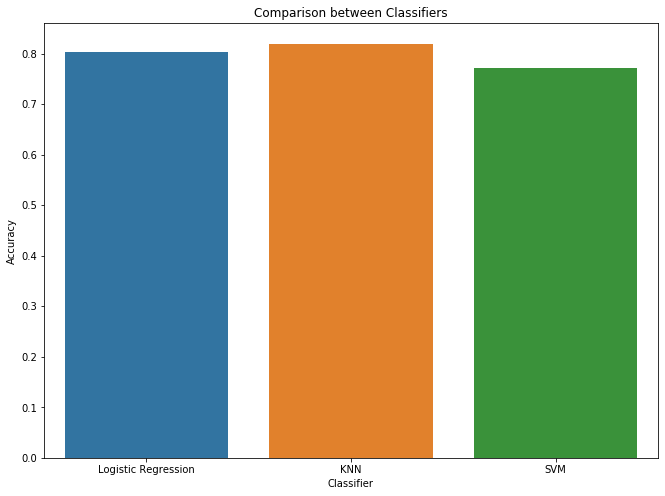

In [92]:
methods = ["Logistic Regression", "KNN", "SVM"]
accuracy = [0.8032,0.8196,0.7704]
plt.subplots(figsize=(11,8))
sns.barplot(x=methods,y=accuracy)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifiers")
plt.show()

We used 3 models to do predictions, the best of them is KNN classifier with 81.96% of accuracy. 

Therefore, in this task, we think KNN model is the best model to predict heart disease.